In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
import plotly.express as px

In [145]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [147]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [ ]:
# Drop column that is not needed
df = df.drop(columns=['Other names'])
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [149]:
print(df.columns.tolist())

['Country', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']


In [ ]:
#Rename column with weird spaces
df = df.rename(columns={"Tot\xa0Cases//1M pop": "Tot Cases/1M pop", "Tot\xa0Deaths/1M pop": "Tot Deaths/1M pop"})
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases/1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [151]:
features = ['Population', 'Total Cases', 'Total Deaths', 'Tot Cases/1M pop', 'Tot Deaths/1M pop', 'Death percentage']
X = df[features]

# Visualization

In [152]:
fig_death = px.choropleth(
    df, 
    locations="ISO 3166-1 alpha-3 CODE",
    color="Total Deaths",
    hover_name="Country",
    hover_data=["Tot Deaths/1M pop", "Death percentage", "Total Cases"], 
    color_continuous_scale="Reds",
    title="Global COVID-19 Mortality Severity (Total Deaths)",
    projection="natural earth"
)

fig_death.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig_death.show()

The choropleth map illustrates the global distribution of absolute COVID-19 mortality, where color intensity corresponds to the total number of deaths. The visualization highlights a disparity in the pandemic's toll, with the deepest red regions—most notably the United States, Brazil, and India bearing the overwhelming majority of the absolute death count. This concentration suggests that while the pandemic was a global event, the sheer volume of fatalities was disproportionately centered in a few geographically large and populous nations. In contrast, the widespread lighter regions indicate that while other countries were affected, their absolute death totals remained significantly lower, likely due to differences in population size, reporting standards, or containment strategies.

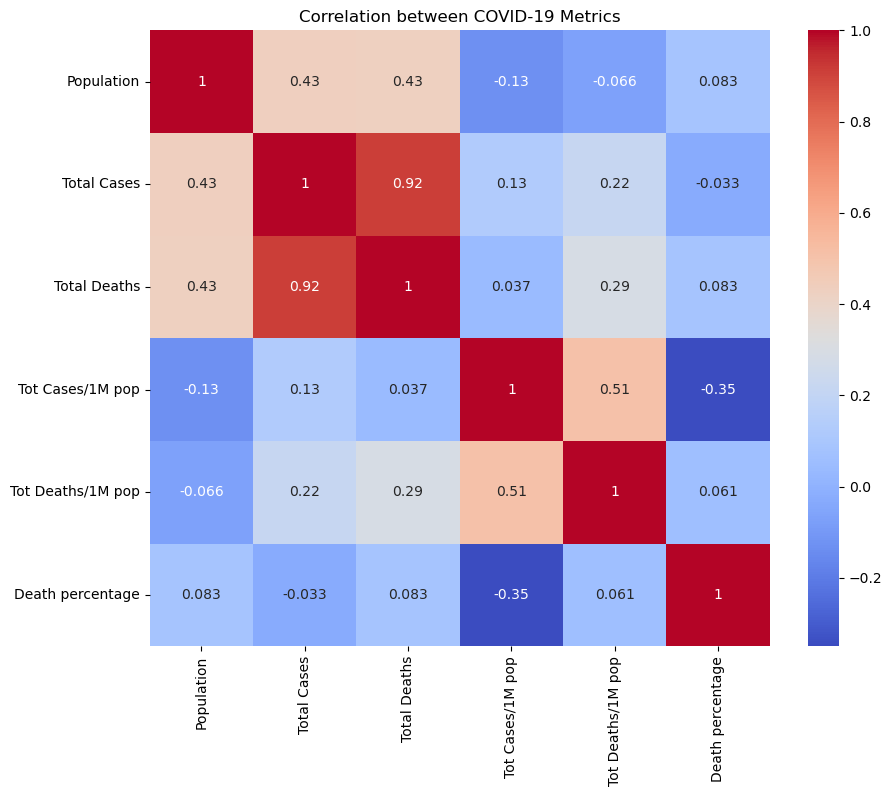

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between COVID-19 Metrics")
plt.show()

The correlation heatmap reveals critical relationships between the COVID-19 dataset features, highlighting potential redundancies. The most dominant finding is the extremely strong positive correlation (0.92) between Total Cases and Total Deaths, which indicates that countries with higher infection counts almost essentially have higher absolute death tolls. This suggests that these two variables provide very similar information to the clustering model. Furthermore, the Population variable shows a moderate positive correlation with total cases (0.43) but a weak negative correlation with Tot Cases/1M pop (-0.13). This distinction is crucial: it confirms that using "per million" metrics is necessary to normalize the data, allowing the model to evaluate the severity of the pandemic independently of a country's physical size or population density.


# Scaling

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

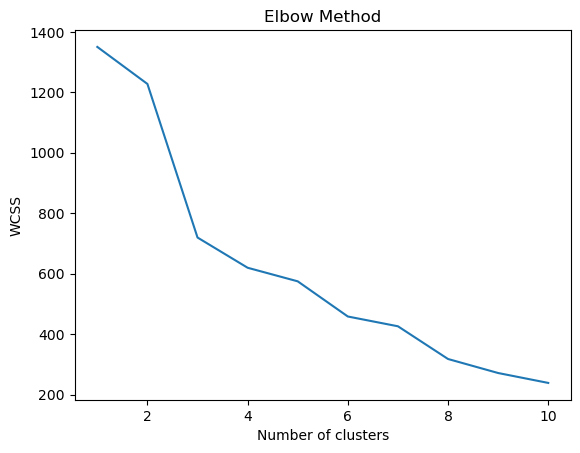

In [155]:
from sklearn.cluster import KMeans, AgglomerativeClustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1,11),
    "WCSS": wcss
})
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1350.000000
1                   2  1227.510625
2                   3   719.506559
3                   4   619.535262
4                   5   574.605613
5                   6   458.278870
6                   7   425.924055
7                   8   317.696393
8                   9   271.329812
9                  10   238.569237


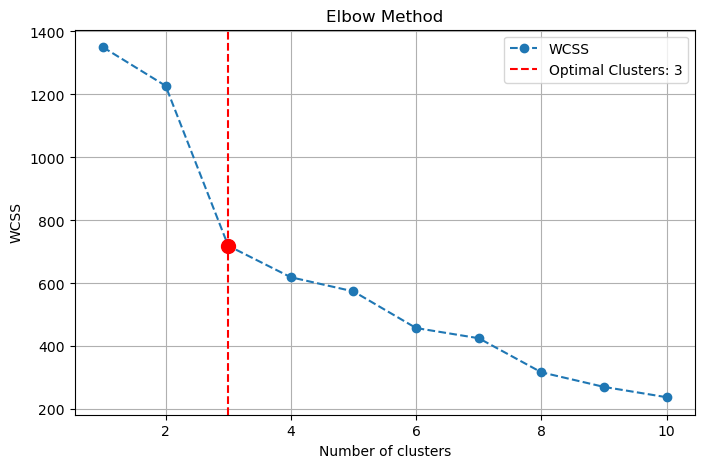

The optimal number of clusters is: 3


In [ ]:
clusters = range(1, 11)
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()
print(f"The optimal number of clusters is: {optimal_clusters}")

In [158]:
from sklearn.metrics import silhouette_score
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
score_km = silhouette_score(X_scaled, kmeans_labels)
print(f'KMeans Silhouette Score: {score_km}')

KMeans Silhouette Score: 0.3825805344277662


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11096\2016085741.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




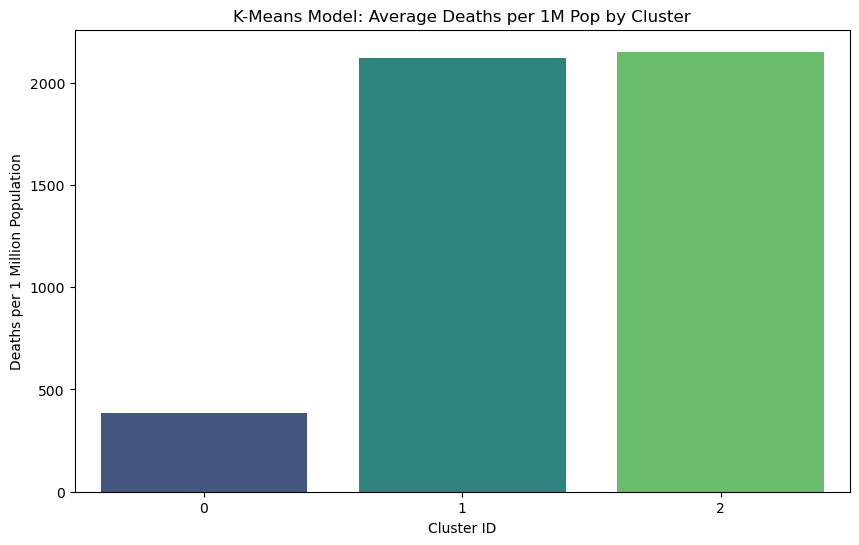

In [169]:
def plot_cluster_analysis(model_name, cluster_col):
    summary = df.groupby(cluster_col)[analyze_cols].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=summary, x=cluster_col, y='Tot Deaths/1M pop', palette='viridis')
    plt.title(f'{model_name}: Average Deaths per 1M Pop by Cluster')
    plt.xlabel('Cluster ID')
    plt.ylabel('Deaths per 1 Million Population')
    plt.show()

    df[cluster_col] = df[cluster_col].astype(str)    
    fig = px.choropleth(df, 
                        locations="ISO 3166-1 alpha-3 CODE",
                        color=cluster_col, 
                        hover_name="Country",
                        hover_data=analyze_cols,
                        title=f"{model_name}: Countries Grouped by Cluster",
                        projection="natural earth",
                        color_discrete_sequence=px.colors.qualitative.Set1) 
    fig.show()

plot_cluster_analysis("K-Means Model", "Cluster_KMeans")

1. K-Means Bar Plot: Average Deaths per 1M Population
This bar chart highlights a stark disparity in pandemic severity across the three K-Means clusters. Cluster 0 represents the vast majority of nations with a significantly low mortality rate (below 500 deaths per million), suggesting successful containment or potential underreporting. In sharp contrast, Clusters 1 and 2 demonstrate a severe healthcare burden, with both groups exceeding 2,000 deaths per million population. This visualization confirms that the K-Means model successfully differentiated between low-impact zones and regions where the virus caused a catastrophic loss of life relative to the population size.

2. K-Means World Map: Global Cluster Distribution
The K-Means choropleth map geographically distributes the three identified clusters, revealing distinct regional patterns in the pandemic's impact. Cluster 0 (Red) dominates the African continent, Southeast Asia, and Australia, aligning with the low-mortality metrics observed in the previous bar chart. Meanwhile, the high-severity Cluster 2 (Green) identifies specific "hotspots" such as the United States, Brazil, and parts of Western Europe, while Cluster 1 (Blue) captures Russia and other transitional regions, visualizing exactly where the global healthcare burden was most concentrated.

# Hierarchical Agglomerative Clustering

Skipping Ward linkage with Manhattan metric (not supported).


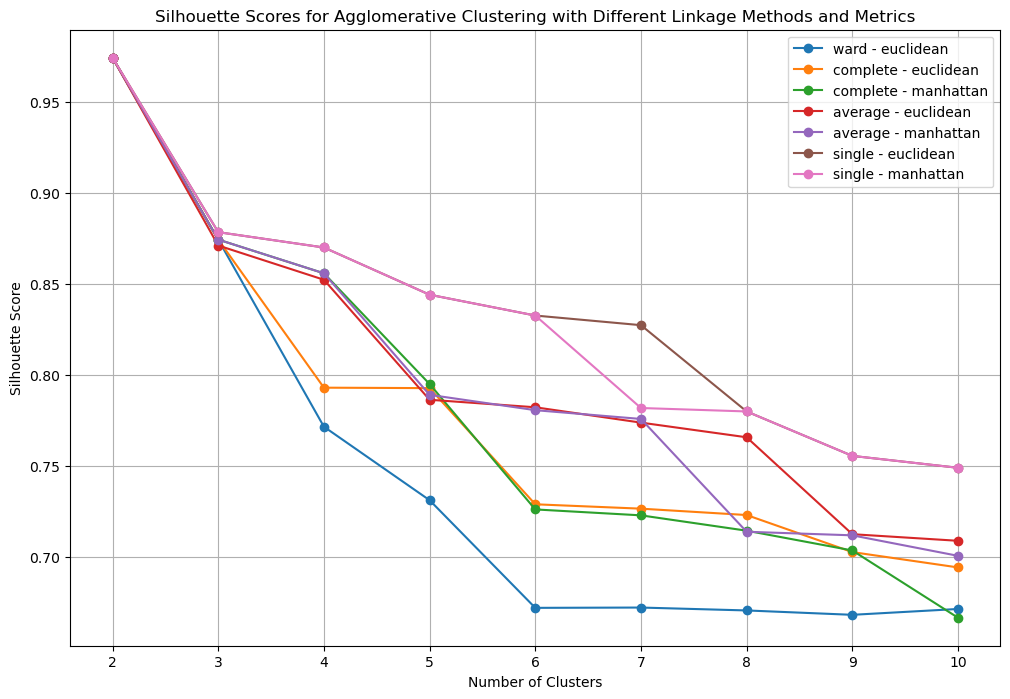

Best Silhouette Score: 0.9742203031137054
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [ ]:
range_n_clusters = range(2, 11) 
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        
        if linkage_method == 'ward' and metric != 'euclidean':
            print("Skipping Ward linkage with Manhattan metric (not supported).")
            continue
        
        current_scores = []
        
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage=linkage_method,
                metric=metric
            )
            y_agglo = agglo.fit_predict(df[features])
            if len(np.unique(y_agglo)) < 2:
                current_scores.append(None)
                continue
            silhouette_avg = silhouette_score(df[features], y_agglo)
            current_scores.append(silhouette_avg)
            
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
                
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


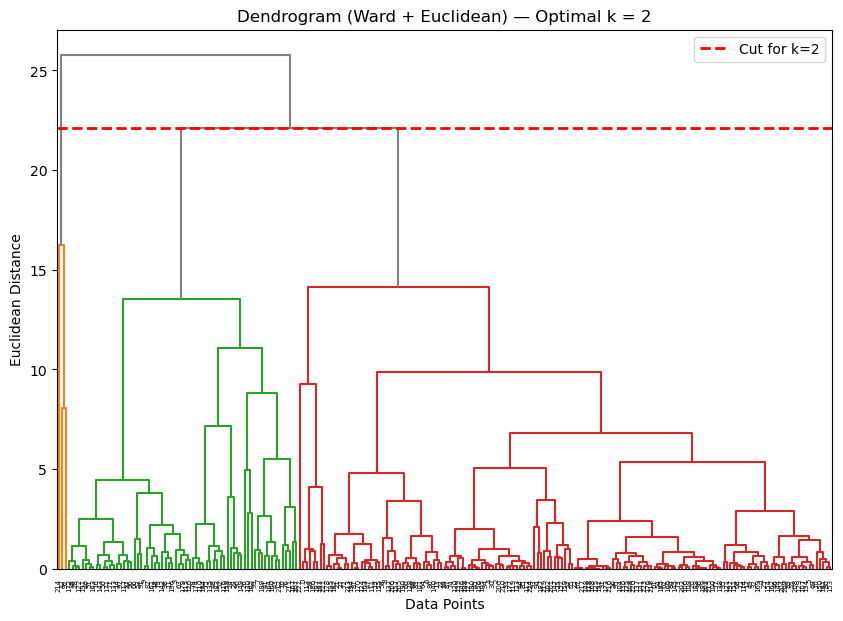

In [171]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster

method = "ward"
metric = "euclidean"
optimal_k = 2
linked = linkage(X_scaled, method=method, metric=metric)

clusters = fcluster(linked, optimal_k, criterion='maxclust')
distance_threshold = sorted(linked[:, 2], reverse=True)[optimal_k - 1]
plt.figure(figsize=(10, 7))
sch.dendrogram(
    linked,
    color_threshold=distance_threshold,
    above_threshold_color='grey'
)

plt.axhline(y=distance_threshold, color='red', linestyle='--', linewidth=2, label=f"Cut for k={optimal_k}")

plt.title("Dendrogram (Ward + Euclidean) — Optimal k = 2")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.legend()
plt.show()


In [161]:
linked_scaled = linkage(X_scaled, method='ward', metric='euclidean')
hc_labels = fcluster(linked_scaled, t=2, criterion='maxclust')
score_hc = silhouette_score(X_scaled, hc_labels)
print(score_hc)

0.8099290541509596


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11096\511703638.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




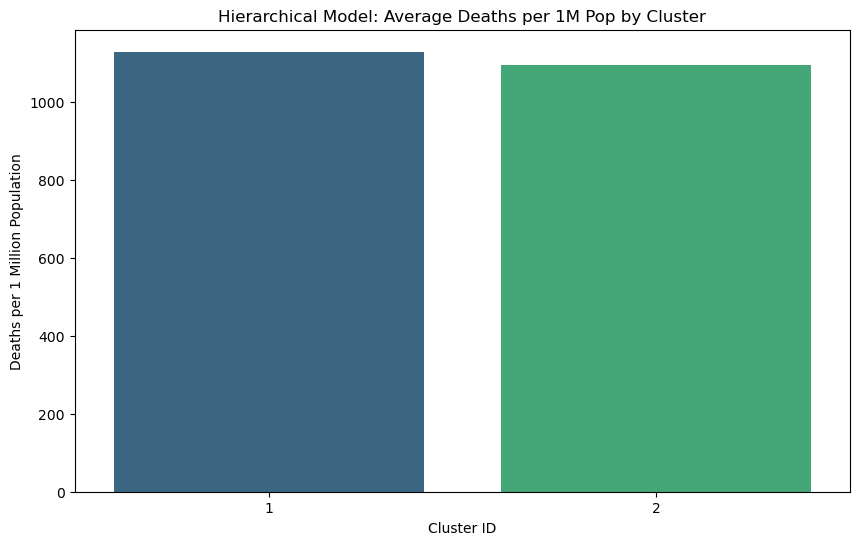

In [170]:
def plot_cluster_analysis(model_name, cluster_col):
    summary = df.groupby(cluster_col)[analyze_cols].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=summary, x=cluster_col, y='Tot Deaths/1M pop', palette='viridis')
    plt.title(f'{model_name}: Average Deaths per 1M Pop by Cluster')
    plt.xlabel('Cluster ID')
    plt.ylabel('Deaths per 1 Million Population')
    plt.show()

    df[cluster_col] = df[cluster_col].astype(str)    
    fig = px.choropleth(df, 
                        locations="ISO 3166-1 alpha-3 CODE",
                        color=cluster_col, 
                        hover_name="Country",
                        hover_data=analyze_cols,
                        title=f"{model_name}: Countries Grouped by Cluster",
                        projection="natural earth",
                        color_discrete_sequence=px.colors.qualitative.Set1) 
    fig.show()

plot_cluster_analysis("Hierarchical Model", "Cluster_HC")

1. Hierarchical World Map: Global Cluster Distribution
The Hierarchical Clustering map presents a simplified binary classification (k=2), dividing the world into "Global Outliers" (Blue) and the "General Population" (Red). The Blue Cluster (Cluster 1) specifically targets nations with massive populations and absolute infection totals—such as the United States, Brazil, India, Russia, and China. This visualization demonstrates that the Hierarchical model prioritized separating these pandemic "epicenters" and demographic giants from the rest of the world, creating a clean distinction based on the sheer scale of the outbreak.

2. Hierarchical Bar Plot: Average Deaths per 1M Population
Unlike the K-Means comparison, the Hierarchical model's bar chart shows that the average deaths per million are relatively balanced between the two clusters (both hovering near 1,100). This indicates that the Hierarchical model grouped countries based on absolute magnitude (Total Cases or Population) rather than per-capita severity rates. Consequently, "Cluster 2" (The Green bar) averages together high-death European nations with low-death African nations, causing the mortality rate to level out and appear similar to the "Outlier" nations in Cluster 1.

# Summary

In [ ]:
print(f"K-Means Silhouette Score (k=3): {score_km:.4f}")
print(f"Hierarchical Silhouette Score (k=2): {score_hc:.4f}")

df['Cluster_KMeans'] = kmeans_labels
df['Cluster_HC'] = hc_labels

K-Means Silhouette Score (k=3): 0.3826
Hierarchical Silhouette Score (k=2): 0.8099


In [ ]:
analyze_cols = ['Total Cases', 'Total Deaths', 'Tot Cases/1M pop', 'Tot Deaths/1M pop', 'Death percentage']

# 1. Summary for K-Means
print("--- K-Means Cluster Summary ---")
kmeans_summary = df.groupby('Cluster_KMeans')[analyze_cols].mean()
print(kmeans_summary)

# 2. Summary for Hierarchical Clustering
print("\n--- Hierarchical Cluster Summary ---")
hc_summary = df.groupby('Cluster_HC')[analyze_cols].mean()
print(hc_summary)

--- K-Means Cluster Summary ---
                 Total Cases   Total Deaths  Tot Cases/1M pop  \
Cluster_KMeans                                                  
0               5.945387e+05    7237.699248      43609.000000   
1               2.894767e+06   33970.067416     276267.404494   
2               5.162264e+07  729959.666667     138262.666667   

                Tot Deaths/1M pop  Death percentage  
Cluster_KMeans                                       
0                      387.022556          1.671177  
1                     2121.719101          1.101315  
2                     2151.333333          1.548193  

--- Hierarchical Cluster Summary ---
             Total Cases   Total Deaths  Tot Cases/1M pop  Tot Deaths/1M pop  \
Cluster_HC                                                                     
1           4.167428e+07  511416.000000      91831.666667        1129.666667   
2           1.651140e+06   20908.022523     137509.409910        1096.270270   

            D

# 1. Cluster Summary

**K-MEANS Clusters (k=3)**
1. **Cluster 0** = Low-case, Low-death Countries
* Total Cases: ~594K
* Total Deaths: ~7,238
* Deaths per 1M: **387** (lowest)
* Death percentage: **1.67%**
  → Small outbreaks OR massive underreporting.
2. **Cluster 1** = High Cases, Moderate Severity
* Total Cases: ~2.89M
* Total Deaths: ~33,970
* Deaths per 1M: **2121**
* Death percentage: **1.10%** (lowest)
  → Larger outbreaks but relatively controlled mortality.
3. **Cluster 2** = Extremely High Burden Countries
* Total Cases: **51.6M**
* Total Deaths: **~730K**
* Deaths per 1M: **2151**
* Death percentage: **1.55%**
  → Major hotspots with sustained transmission.

**Hierarchical Clusters (k=2)**

1. **Cluster 1** = Massive Case Load, Moderate Death Intensity
* Total Cases: **41.6M**
* Total Deaths: **511K**
* Cases per 1M: **91,832**
* Deaths per 1M: **1130**
* Death percentage: **1.81%**
  → High exposure + moderately high fatality.
2. **Cluster 2** = Mid-case Countries with Comparable Death Rate
* Total Cases: **1.65M**
* Total Deaths: **20,908**
* Cases per 1M: **137,509**
* Deaths per 1M: **1096**
* Death percentage: **1.44%**
  → Smaller outbreaks but still significant impact.

# 2.Cluster Profiling

**K-MEANS**
1. **Cluster 0 – Low Numbers, Likely Data-Poor** = This group is defined by exceptionally low case and mortality figures relative to population size. The disproportionately low death rate per million raises concerns that these metrics may result from limited testing capacity or under-reporting rather than solely from successful viral containment.
2. **Cluster 1 – High Cases, Efficient Health System** = While these nations show high infection rates, their low case fatality ratio suggests robust healthcare infrastructure. The data indicates these countries successfully managed high patient loads through early detection and effective treatment protocols, preventing high mortality.
3. **Cluster 2 – Severe Outbreak, High Mortality Burden** = Characterized by massive cumulative totals for both cases and deaths, this cluster represents regions where transmission was prolonged and uncontrolled. These metrics point to periods of significant healthcare system strain and a potential collapse in critical care capacity.

**Hierarchical**
1. **Cluster 1 – Large, Hard-Hit Countries** = This cluster isolates large nations with extremely high absolute infection numbers. While the per-capita death intensity is moderate, the sheer volume of cases identifies these countries as major hotspots facing immense systemic pressure.
2. **Cluster 2 – Medium-Scale Outbreak Countries** = Comprising countries with lower total caseloads, this group matches the per-capita severity of the first cluster but with significantly lower absolute numbers. This suggests these nations successfully curbed exponential growth early or implemented containment measures that limited the scale of the outbreak.

# 3. Government Policy Recommendations

**Based on K-MEANS**
1. **Cluster 0 — Low-Number Countries**
Issue: Numbers look “too clean”.
Policy:
* Increase PCR capacity & mandatory reporting audits.
* Focus on surveillance in rural and border regions.
* Deploy WHO-aligned data verification systems.
2. **Cluster 1 — High Cases but Low Fatality**
Issue: Outbreaks large but deaths low.
Policy:
* Treat this group as **reference models** for clinical best practices.
* Expand telemedicine & rapid case triage.
* Invest in booster campaigns and variant monitoring.
3. **Cluster 2 — Severe Outbreak Countries**
Issue: Healthcare strain & high mortality.
Policy:
* Mobilize emergency medical teams, oxygen supply, ICU expansion.
* Implement temporary mobility restrictions.
* Build genomic surveillance hubs to detect variants early.
* Prioritize vaccination in high-density areas.

**Based on Hierarchical Clustering**

1. **Cluster 1 — High-Burden Nations**
Issue: Sustained and widespread transmission.
Policy:
* Scale up hospital surge capacity.
* Implement aggressive testing + wastewater surveillance.
* Subsidize antivirals & home-treatment kits.
* Launch mass vaccination/booster drives in urban zones.
2. **Cluster 2 — Medium-Burden Nations**
Issue: Exposure exists but manageable.
Policy:
* Strengthen border screening to prevent reseeding.
* Maintain contact-tracing teams.
* Invest in decentralized lab capacity to avoid blind spots.
* Focus on early childhood vaccination to maintain immunity.

# Conclusion
K-Means (k = 3). **Silhouette Score: 0.3826** → mediocre cohesion and separation. The clusters exist, but boundaries are fuzzy. This mean K-Means model forces separation that doesn’t naturally occur in the data. Resulting in **Weak reliability** for policymaking.
Hierarchical Clustering (k = 2) **Silhouette Score: 0.8099** → extremely strong separation. The clusters have very distinct profiles with minimal overlap. This mean Hierarchical Clustering model captures a **true structural difference** in global pandemic patterns. Resulting in **High reliability** for strategic decisions. So, **Hierarchical model** is the **only one** with strong cluster integrity (silhouette > 0.8).